#    PROIECT SEMESTRU IC1

## by GIRLA Ionut 411-SIVA
### Importing the necessary libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import cv2
import copy
import pandas as pd
import ipyplot
import random
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Definire variabile globale necesare in executie

In [3]:
DATADIR = "E:/SIVA-Master/AN_1/Sem_1/IC1/proiect_semestru/dataset/jaffedbase"
CATEGORIES = []

train_ratio = 0.85
test_ratio = 0.15


Preluare categorii din fisierul text

In [4]:
labels = open("labels.txt")
for img in os.listdir(DATADIR):
    print(img)
    new_string = img.split(sep=".")[0] + "-" + img.split(sep=".")[1]
    print(new_string)
    break
    
with open("labels.txt") as f:
    first_line = f.readline()
    print(first_line)
    CATEGORIES = first_line.split(sep=" ")[1:-1]
    print(CATEGORIES)

KA.AN1.39.tiff
KA-AN1
# HAP SAD SUR ANG DIS PIC

['HAP', 'SAD', 'SUR', 'ANG', 'DIS']


Import poze si construirea setului de date de forma imagine - eticheta

In [5]:
def import_dataset():
    contor = 0
    for img in os.listdir(DATADIR):
            try:
                #print(f"suntem la pasul {contor}")
                new_string = img.split(sep=".")[0] + "-" + img.split(sep=".")[1]
                img_array = cv2.imread(os.path.join(DATADIR,img), cv2.IMREAD_GRAYSCALE)
                labels = open("labels.txt")
                for line in labels:
                    #print(f"line = {line}")
                    if new_string in line:
                        #print(f"new_string = {new_string}; with line = {line}")
                        result = line.split(sep=" ")[1:-1] 
                        max_val = result[0]
                        index = 0
                        #print(len(result))
                        for i in range (1,len(result)):
                            #print(f"i = {i} ; result[i] = {result[i]}; max_val = {max_val}; index = {index}")
                            if max_val < result[i]:
                                index = i
                                max_val = result[i]
                #print(index)
                labels.close()
                dataset.append([img_array, index])
                contor = contor + 1
            except Exception as e:
                pass
dataset = [] 
import_dataset()
print(np.shape(dataset))
#print(np.shape(dataset[0][0]))
#print(np.shape(dataset[0][1]))


(213, 2)


E:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Impartirea in Matrice de caracteristici si vector de valori dependente

In [23]:
X = []
y = []
for features, label in dataset:
    X.append(features)
    y.append(label)
    
#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  #to be uncommented if chosen to resize imgs



x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

x_train = np.reshape(x_train,(len(x_train),256*256))
x_test = np.reshape(x_test,((len(X)-len(x_train)),256*256))
print(f" size of x_train: {len(x_train)}, size of x_test: {len(x_test)}")

print(f" size of x_train: {np.shape(x_train)}, size of x_test: {np.shape(x_test)}")


 size of x_train: 181, size of x_test: 32
 size of x_train: (181, 65536), size of x_test: (32, 65536)


In [6]:
MinMaxScaler().fit_transform(x_train)
MinMaxScaler().fit_transform(x_test)

array([[0.56296296, 0.62878788, 0.54545455, ..., 0.31578947, 0.26086957,
        0.31914894],
       [0.51851852, 0.58333333, 0.60606061, ..., 0.29323308, 0.30434783,
        0.25531915],
       [0.48148148, 0.56818182, 0.65151515, ..., 0.38345865, 0.39855072,
        0.40425532],
       ...,
       [0.51851852, 0.62121212, 0.48484848, ..., 0.43609023, 0.52173913,
        0.46808511],
       [0.8       , 0.83333333, 0.88636364, ..., 0.62406015, 0.61594203,
        0.58865248],
       [0.55555556, 0.59090909, 0.59090909, ..., 0.02255639, 0.02173913,
        0.06382979]])

Aplicare clasificator SVM 

In [24]:

#clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#clf.fit(data_train, y_train)
#y_predicted_svm = clf.predict(data_test)
clf = svm.SVC()
clf.fit(x_train,y_train)
y_predicted_svm = clf.predict(x_test)


cm = confusion_matrix(y_true = y_test[:] ,y_pred = y_predicted_svm)
print(cm)



[[5 0 0 4 6]
 [0 1 0 1 1]
 [0 0 3 0 2]
 [0 0 0 1 0]
 [0 0 1 0 7]]


Calcul precizie

In [25]:
contor = 0
for i in range (len(y_test)):
    if (y_test[i] == y_predicted_svm[i]):
        contor = contor + 1

print(f"precizie = {contor/len(y_test)}")

precizie = 0.53125


Aplicare PCA asupra datelor pastrand cele mai semnificative 50 de componente (din 65536 initiale)

In [9]:

pca = PCA(n_components = 50)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_


In [7]:
print(explained_variance)

NameError: name 'explained_variance' is not defined

Aplicare clasificator dupa reducerea dimensiunilor

In [8]:

#clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#clf.fit(data_train, y_train)
#y_predicted_svm = clf.predict(data_test)
clf_after_pca = svm.SVC()
clf_after_pca.fit(x_train,y_train)
y_predicted_svm = clf_after_pca.predict(x_test)


cm = confusion_matrix(y_true = y_test[:] ,y_pred = y_predicted_svm)
print(cm)

[[3 0 0 1 2]
 [4 1 0 1 1]
 [1 0 3 0 2]
 [0 0 0 3 0]
 [2 0 1 1 6]]


Calculare precizie dupa PCA

In [9]:
contor = 0
for i in range (len(y_test)):
    if (y_test[i] == y_predicted_svm[i]):
        contor = contor + 1

print(f"precizie = {contor/len(y_test)}")

precizie = 0.5


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

# Grid Search


Variem numarul componentelor cat si metoda de scalare a datelor folosita:

4
(4, 3)


E:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


       Scaler  NumberOfComponents  Accuracy
5  No scaling                  35    84.375


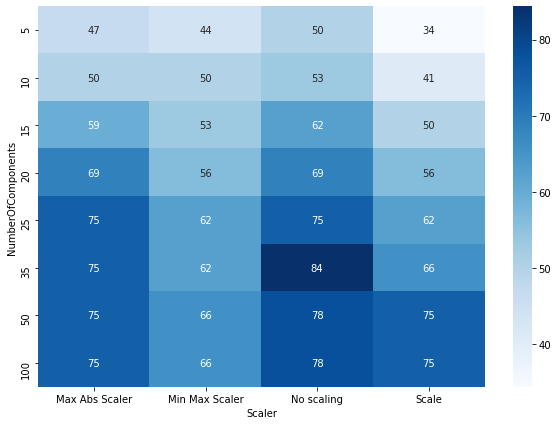

In [26]:
acc_list = []
scaling = [
    ('No scaling', x_train, x_test),
    ('Scale', preprocessing.scale(x_train), preprocessing.scale(x_test)),
    ('Min Max Scaler', MinMaxScaler().fit_transform(x_train), MinMaxScaler().fit_transform(x_test)),
    ('Max Abs Scaler', MaxAbsScaler().fit_transform(x_train), MaxAbsScaler().fit_transform(x_test))
]

print(len(scaling))
print(np.shape(scaling))

pca_values = [5, 10, 15, 20, 25, 35, 50, 100]

for name, train, test in scaling:
    for number_of_components in pca_values:
        train_local = copy.copy(train)
        test_local = copy.copy(test)
        pca = PCA(n_components = number_of_components)
        x_train_curent = pca.fit_transform(train_local)
        x_test_curent = pca.transform(test_local)    
        clf = svm.SVC()
        clf.fit(x_train_curent,y_train)
        y_predicted = clf.predict(x_test_curent)
        acc_list.append([name, number_of_components, accuracy_score(y_predicted, y_test)*100])
acc_df = pd.DataFrame(acc_list)
acc_df.columns = ['Scaler', 'NumberOfComponents', 'Accuracy']

print(acc_df[acc_df.Accuracy == acc_df.Accuracy.max()])

heatmap = pd.pivot_table(acc_df, values='Accuracy', 
                     index=['NumberOfComponents'], 
                     columns=['Scaler'])

plt.figure(figsize=(10,7))
sn.heatmap(heatmap, annot=True, cmap="Blues")
plt.show()

In [42]:
train_local = copy.copy(x_train)
test_local = copy.copy(x_test)
pca = PCA(n_components = 35)
x_train_curent = pca.fit_transform(train_local)
x_test_curent = pca.transform(test_local)  
clf = svm.SVC()
clf.fit(x_train_curent,y_train)
y_predicted = clf.predict(x_test_curent)

cm = confusion_matrix(y_true = y_test[:] ,y_pred = y_predicted)
print(cm)
        


contor = 0
for i in range (len(y_test)):
    if (y_test[i] == y_predicted[i]):
        contor = contor + 1

print(f"precizie = {contor/len(y_test)}")

[[12  0  0  3  0]
 [ 0  2  0  1  0]
 [ 0  0  5  0  0]
 [ 0  0  0  1  0]
 [ 0  0  1  0  7]]
precizie = 0.84375


In [43]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [44]:
clf.score(x_test_curent,y_test)

0.84375

In [45]:
with open('train.pickle', 'wb') as f:
    pickle.dump([x_train_curent, y_train], f)

In [46]:
with open('test.pickle', 'wb') as f:
    pickle.dump([x_test_curent, y_test], f)

In [47]:
with open('train.pickle', 'rb') as f:
    x_train_pickle, y_train_pickle = pickle.load(f)
    
with open('test.pickle', 'rb') as f:
    x_test_pickle, y_test_pickle = pickle.load(f)

clf = svm.SVC()
clf.fit(x_train_curent,y_train)
y_predicted = clf.predict(x_test_curent)

cm = confusion_matrix(y_true = y_test[:] ,y_pred = y_predicted)
print(cm)
        

clf.score(x_test_curent,y_test)

[[12  0  0  3  0]
 [ 0  2  0  1  0]
 [ 0  0  5  0  0]
 [ 0  0  0  1  0]
 [ 0  0  1  0  7]]


0.84375

In [48]:
with open('finalized_model.sav', 'rb') as f:
    clf = pickle.load(f)
   
with open('test.pickle', 'rb') as f:
    x_test_pickle, y_test_pickle = pickle.load(f)   
    
    
clf.score(x_test_pickle,y_test_pickle)

0.84375